# Q6

### Build a quadric model for the fish dataset to predict the value of weight from the other numeric variables 


In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df = pd.read_csv("data/fish.csv")
# print(type(df))
# df.head()

### Explore the data

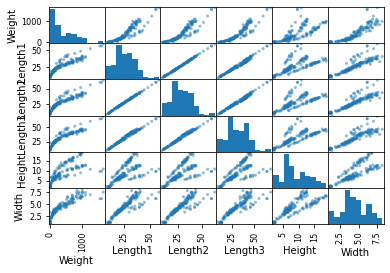

In [31]:
# Draw scatter matrix
# scatter_matrix(df, figsize=(10, 10))
scatter_matrix(df)
plt.show()
# plt.savefig('plots/p3stacklossScatter.png')

#### Note. Quadratic terms in all the variables might give a better model

### Prepare the data

In [32]:
X = df.drop('Weight', axis='columns')
X = pd.get_dummies(X)
y = df.Weight

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Build the model

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

# print('intercept:', model.intercept_)
# print('slopes:', model.coef_)
print('R squared:', model.score(X,y))

yhat = model.predict(X_test)
print('RMSE', mean_squared_error(y_test, yhat, squared=False))

R squared: 0.9344082354012225
RMSE 103.43601101632


# Iterate and include quadratic terms

In [34]:
X['L1squared'] = np.square(df.Length1)
X['L2squared'] = np.square(df.Length2)
X['L3squared'] = np.square(df.Length3)
X['Hsquared'] = np.square(df.Height)
X['Wsquared'] = np.square(df.Width)

In [35]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model.fit(X_train, y_train)
yhat = model.predict(X_test)


print('R squared:', model.score(X,y))
print('RMSE', mean_squared_error(y_test, yhat, squared=False))

R squared: 0.9837935137700506
RMSE 46.02652013245152


#### Note
+ R^2 has gone up. This is good but you need to be careful with this, as in general it can go up when more variables are added.
+ RMSE has gone down. This is the important measure. Tells us the model is better on previously unseen data. 